<a href="https://colab.research.google.com/github/SupawadeeKhamthuy/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [4]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [5]:
Name = 'สุภาวดี คำทุย'
ID = '6230205446'

In [6]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [7]:
Data = DataGenerator(Name,ID)

020:30:13


In [8]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.122979,-3.295591,-1.905968,8.807450,3.436086,-7.863223,7.261924,-2.483273,5.677271,-1.384419,-5.713879,-0.701148,-4.897625,-6.022824,-4.822365,2.341001,-1.972514,9.505130,2.176511,-7.749094,7.020367,-4.584958,-8.326107,-4.272719,4.336434,-5.695388,-2.706593,8.540504,10.424226,2.216951,-6.591182,13.084756
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083,22.609099
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718,-19.753085
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462,20.228213
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515,32.630334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.621194,3.082826,-6.051600,-9.254466,5.131143,0.667478,-1.629920,-1.360385,-1.946909,-4.092077,2.009247,1.749112,-3.929099,-1.599213,-3.747115,1.836762,-7.503489,3.989790,5.298064,-6.293570,5.447109,-3.485855,3.683923,5.746130,5.880837,2.346970,2.474427,0.988740,-2.332277,0.787062,6.165651,5.935309
9996,-0.565152,4.502084,-4.958137,-1.130835,6.393298,-10.045349,-5.483434,-6.521711,-3.976157,2.130145,-7.738335,-2.840233,1.204603,-4.691612,-2.654711,1.921697,7.099371,-0.297220,-10.052557,7.396492,6.868344,-2.660437,2.540235,-0.749447,4.566415,-7.151448,-8.291589,8.715938,5.509624,-7.029211,9.004169,-33.146053
9997,5.458936,6.669342,-9.677379,-4.951354,5.975153,0.109411,9.595156,0.086257,6.671417,-0.332043,7.129822,-5.413321,-0.944951,-0.779493,-1.810268,6.062982,-3.143105,-2.785437,-1.798621,-2.375633,2.291665,-6.591749,4.390090,-3.670793,11.363186,-6.152867,4.829156,-1.963335,-7.680129,4.356970,13.338685,23.784849
9998,5.167506,9.960286,5.908806,-5.992349,-6.306272,-2.778985,11.405055,1.561802,7.698767,-9.825561,5.709468,-9.183920,-9.588192,-11.000842,-5.495952,-3.846113,9.210216,7.947077,0.979926,6.075725,-9.279143,4.291894,-9.643116,-6.771529,8.741895,-2.417855,6.372045,1.503416,3.849181,4.402622,19.920572,24.013108


In [9]:
Data.shape # ดูว่ามีทั้งหมดกี่ dimension จากการรันออกมาพบว่ามี 32 dimension

(10000, 32)

In [10]:
import numpy as np

In [11]:
corr = np.corrcoef(Data.to_numpy().T) # หา correlation

In [12]:
corr.shape

(32, 32)

In [13]:
corr

array([[ 1.        ,  0.11158179,  0.0475386 , ...,  0.13355265,
         0.11158179,  0.13355265],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.0475386 ,  0.28012196,  1.        , ..., -0.05306425,
         0.28012196, -0.05306425],
       ...,
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ]])

In [14]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') #มีผลรันออกมา หมายความว่า มีค่าที่ซ้ำกันอยู่ในข้อมูลนี้

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


In [48]:
new_data = Data.iloc[:29,:-3]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-1.122979,-3.295591,-1.905968,8.807450,3.436086,-7.863223,7.261924,-2.483273,5.677271,-1.384419,-5.713879,-0.701148,-4.897625,-6.022824,-4.822365,2.341001,-1.972514,9.505130,2.176511,-7.749094,7.020367,-4.584958,-8.326107,-4.272719,4.336434,-5.695388,-2.706593,8.540504,10.424226
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567
5,-0.008196,-3.905819,-2.637004,11.584560,3.609969,-4.922349,4.130803,-0.354242,5.428811,-1.945650,-4.310180,-0.241423,-6.209236,-6.010673,-4.444782,0.892926,-0.181288,8.701273,4.289904,-6.810533,6.110376,-5.082506,-8.846683,-2.556855,3.647087,-5.247500,-4.014248,8.827011,10.689298
6,-1.451118,-3.321407,-2.468177,9.508984,5.016766,-6.770164,4.504332,-2.038038,6.095116,-0.102597,-3.310334,0.996609,-5.974946,-6.391871,-1.672765,0.671353,-1.996846,10.266452,1.928209,-6.279352,5.981063,-4.801057,-10.811158,-2.119801,1.681898,-4.812102,-2.681608,10.315724,10.353871
7,0.671690,-3.830463,-0.928794,2.866057,2.734904,8.027056,3.700261,0.083224,-6.226578,1.571061,-2.371665,-4.958551,2.637631,5.244587,2.638098,3.244530,3.351471,10.712978,6.363050,5.405759,-2.681341,-5.938889,9.305665,-0.477574,-1.606843,2.578406,4.564302,5.876039,-1.284383
8,5.277115,8.073927,5.872592,-6.940423,-4.473827,-4.723098,7.874479,1.942789,7.342161,-8.149539,5.774390,-9.927808,-10.244034,-11.283071,-4.226304,-2.097110,9.967098,9.084981,-0.842068,4.887911,-10.149832,5.400242,-8.597745,-6.325101,8.145970,-3.728967,7.788023,1.827706,4.067961
9,1.025774,-2.732722,-5.124041,10.234182,0.261584,3.921261,-5.994564,4.755783,4.560511,5.574445,7.317284,5.869593,-2.121829,6.747645,-9.036736,7.351578,5.730886,1.557586,2.191701,9.230923,-0.864130,0.881085,-0.224412,4.042582,-10.335821,-8.488596,-7.493380,7.581814,-2.737221


## **ข้อที่2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**Import**

In [15]:
from sklearn.cluster import KMeans #การนำเข้าข้อมูล

**Define**

In [16]:
kmeans = KMeans(random_state=2021) #เริ่มสุ่มที่จุดเดียวกัน

**Fit-Transform**

คำนวณหาจุด cluster centers ของข้อมูล Data ด้วยวิธี K-means clustering

In [17]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดงจุด cluster centers ที่คำนวณออกมาได้

In [18]:
kmeans.cluster_centers_

array([[-3.63126731e+00, -2.21272742e+00, -4.91946255e+00,
         8.21931883e+00,  5.62424329e+00, -7.78435110e+00,
         6.69930926e+00,  2.59944150e+00,  6.34364609e+00,
         3.74593986e-01, -6.56408139e+00, -1.00806471e+00,
         1.32121437e+00, -4.99447916e+00, -5.53282563e+00,
        -2.42435519e+00,  2.91543386e-01, -6.13465297e-01,
         3.25077574e+00, -7.61301774e+00,  1.87439711e+00,
        -6.51551107e+00, -2.88111443e+00, -4.11406387e+00,
         4.04676659e+00, -1.06373383e+00, -3.32195202e+00,
         3.80757458e-02,  9.84082630e+00,  2.76321150e+00,
        -4.42545484e+00,  1.58160575e+01],
       [-4.24513971e-01,  4.41983209e+00, -4.84945412e+00,
        -3.58686735e+00,  5.96374717e+00, -8.96207334e+00,
        -4.70838398e+00, -5.94458586e+00, -5.59174800e+00,
         3.26748124e+00, -7.56320707e+00, -2.11044982e+00,
         2.25315025e+00, -3.53065610e+00, -3.70923433e+00,
         2.14593996e+00,  6.69113235e+00, -1.68840695e+00,
        -9.04

ทดสอบการจักกลุ่มของ Data

In [19]:
y = kmeans.predict(Data)
y

array([0, 0, 1, ..., 5, 5, 6], dtype=int32)

### **PCA**

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_pca = pca.fit_transform(Data)

In [21]:
from matplotlib import pyplot as plt

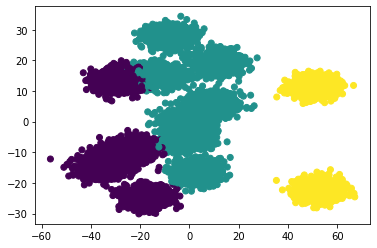

In [22]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

**SSE**

In [23]:
kmeans.inertia_ ## SSE (Sum of Squared Errors)

10129784.269352978

In [24]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [25]:
SSE

[17376235.56078428,
 12379473.796194354,
 10129784.269352978,
 8730523.544304458,
 7615456.759086133,
 6520299.778351892,
 5320747.510562791,
 4223015.069657261]

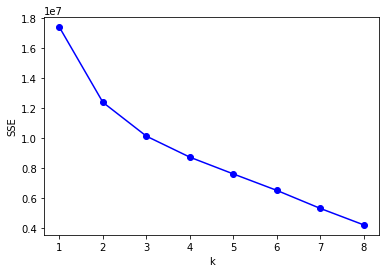

In [26]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

Silhouette coefficient

In [27]:
from sklearn import metrics

In [28]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

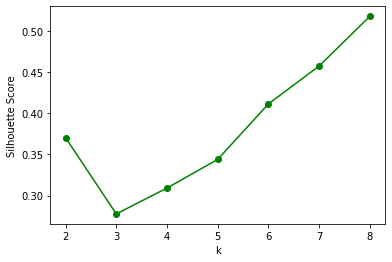

In [29]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

## **ข้อที่3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

In [55]:
from sklearn.manifold import MDS #การนำข้อมูลเข้าเหมือนเดิม

In [56]:
mds = MDS(n_components=2)

In [57]:
new_mds = mds.fit_transform(new_data)

In [58]:
kmeans_1 = KMeans(n_clusters=3,random_state=2021)
kmeans_1.fit(new_data)
p = kmeans_1.predict(new_data)

Text(0.5, 1.0, 'DataGenerator')

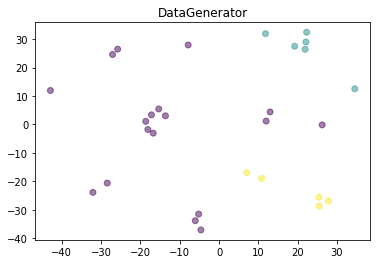

In [60]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=p,alpha=0.5)
plt.title('DataGenerator')

### **ข้อที่ 4 เปรียบเทียบความแตกต่างของผลข้อ 2 กับ ข้อ 3**

ผลข้อที่ 2 และข้อที่ 3

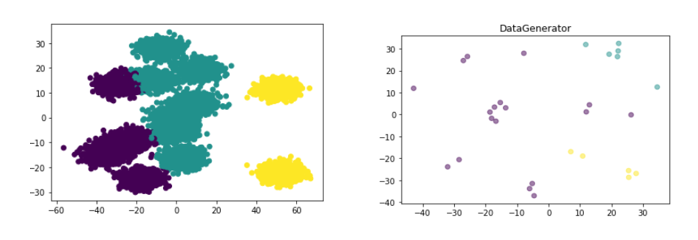